# ***Importing Libraries***📌

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session





/kaggle/input/supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# ***Intial Exploration***

In [3]:
# Read and Show data
super=pd.read_csv("/kaggle/input/supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv")
super.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
# Show more details about data
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
#check null values
super.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

 # **Exploration of Categorical Columns**

In [6]:
#the resulting Series has relative frequencies of the unique values
super['Category'].value_counts(normalize=True)


Snacks               0.151491
Eggs, Meat & Fish    0.149089
Fruits & Veggies     0.141885
Bakery               0.141385
Beverages            0.140084
Food Grains          0.139884
Oil & Masala         0.136182
Name: Category, dtype: float64

In [7]:
# sample of frequencies for Category,Sub Category,City in a tabular form
print(super[['Category','Sub Category','City']].value_counts().to_markdown())

|                                                              |   0 |
|:-------------------------------------------------------------|----:|
| ('Beverages', 'Soft Drinks', 'Perambalur')                   |  44 |
| ('Beverages', 'Health Drinks', 'Ramanadhapuram')             |  40 |
| ('Beverages', 'Health Drinks', 'Chennai')                    |  39 |
| ('Beverages', 'Soft Drinks', 'Tirunelveli')                  |  38 |
| ('Beverages', 'Health Drinks', 'Ooty')                       |  38 |
| ('Beverages', 'Soft Drinks', 'Madurai')                      |  38 |
| ('Beverages', 'Health Drinks', 'Viluppuram')                 |  37 |
| ('Beverages', 'Health Drinks', 'Tenkasi')                    |  36 |
| ('Beverages', 'Health Drinks', 'Vellore')                    |  35 |
| ('Beverages', 'Health Drinks', 'Tirunelveli')                |  33 |
| ('Beverages', 'Health Drinks', 'Salem')                      |  33 |
| ('Beverages', 'Soft Drinks', 'Theni')                        |  33 |
| ('Be

In [8]:
# we can save this result into dataframe
freq=super[['Category','Sub Category','City']].value_counts().reset_index()
freq=freq.rename(columns={0: 'frequency'})
freq

,Category,Sub Category,City,frequency
0,Beverages,Soft Drinks,Perambalur,44
1,Beverages,Health Drinks,Ramanadhapuram,40
2,Beverages,Health Drinks,Chennai,39
3,Beverages,Soft Drinks,Tirunelveli,38
4,Beverages,Health Drinks,Ooty,38
...,...,...,...,...
547,Food Grains,Atta & Flour,Trichy,7
548,Fruits & Veggies,Organic Vegetables,Ramanadhapuram,7
549,Fruits & Veggies,Fresh Fruits,Madurai,7
550,"Eggs, Meat & Fish",Fish,Viluppuram,5


Text(0.5, 1.0, 'Frequencies distribution of Sub Category,City')

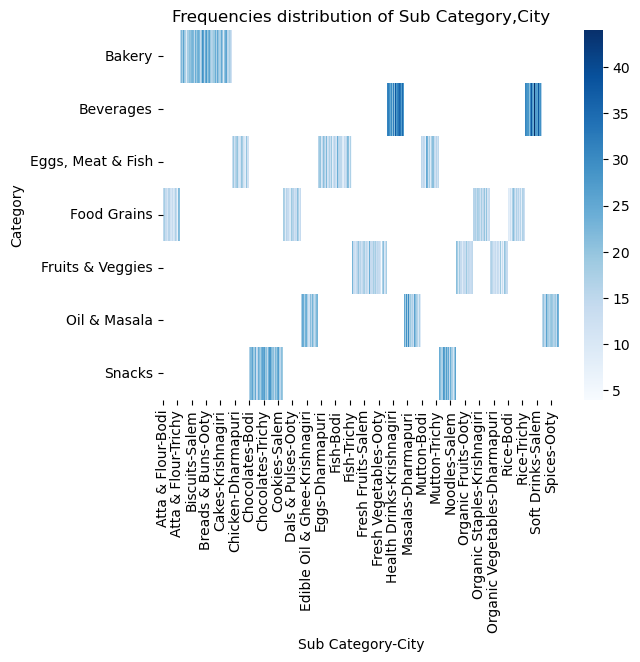

In [9]:

pivot_table = freq.pivot_table(index='Category', columns=['Sub Category', 'City'], values='frequency')
sns.heatmap(pivot_table, cmap='Blues')
sns.set(rc={'figure.figsize':(14,8)})
plt.xticks(rotation=90)
plt.title("Frequencies distribution of Sub Category,City")

# **Creating bar chart.**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Oil & Masala'),
  Text(2, 0, 'Snacks'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'Eggs, Meat & Fish'),
  Text(5, 0, 'Fruits & Veggies'),
  Text(6, 0, 'Food Grains')])

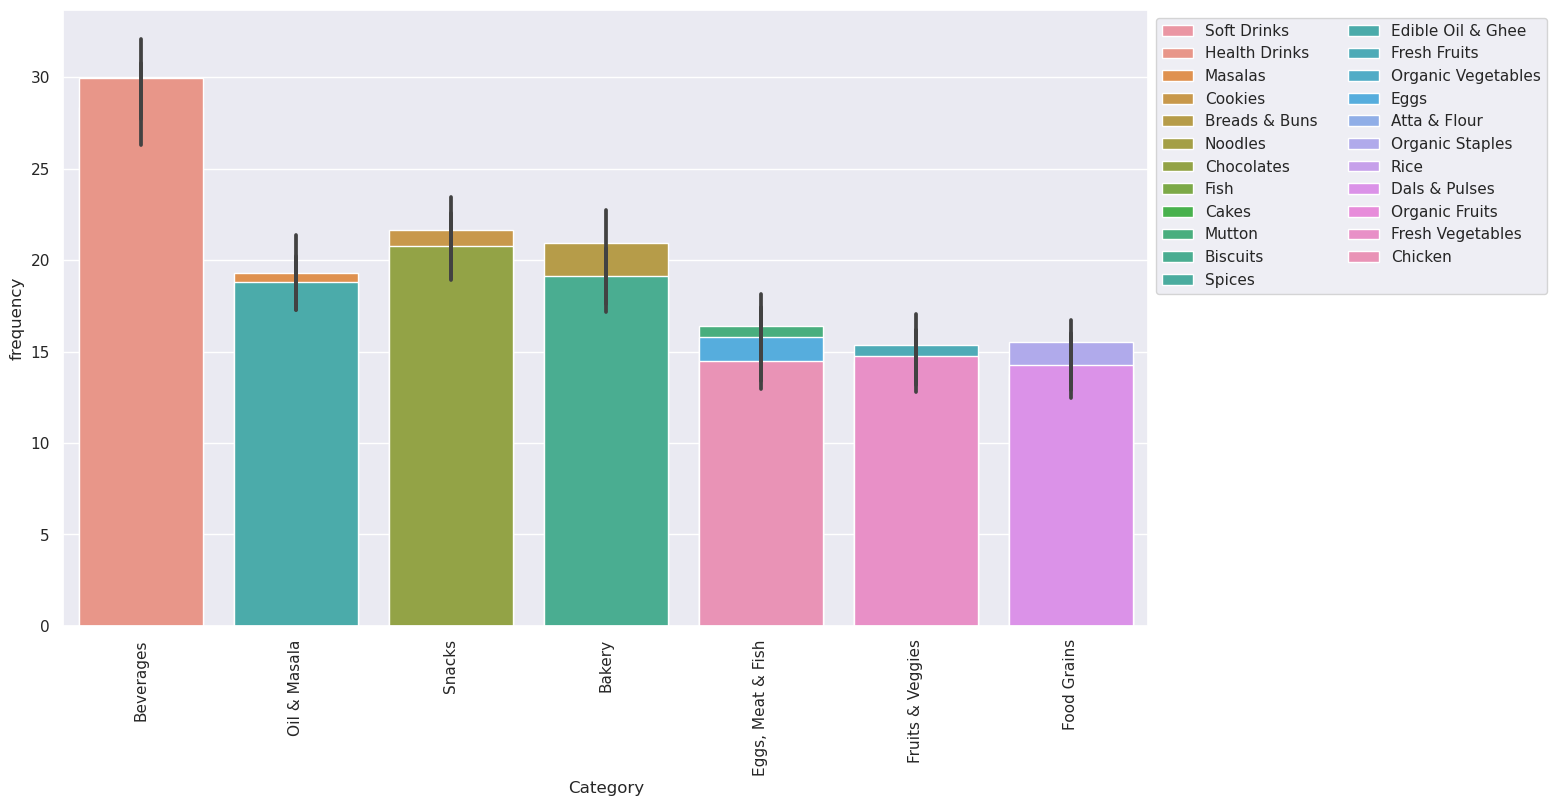

In [10]:
ax=sns.barplot(data=freq, x='Category', y='frequency', hue='Sub Category', dodge=False)
sns.set(rc={'figure.figsize':(14,8)})
ax.legend(bbox_to_anchor=(1, 1), ncol=2)
plt.xticks(rotation=90)

## **Exploration of Numerical Columns**

In [37]:
# summary statistics
super.describe()


,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [38]:
numrical_columns=super.select_dtypes('number')
numrical_columns

,Sales,Discount,Profit
0,1254,0.12,401.28
1,749,0.18,149.80
2,2360,0.21,165.20
3,896,0.25,89.60
4,2355,0.26,918.45
...,...,...,...
9989,945,0.16,359.10
9990,1195,0.26,71.70
9991,1567,0.16,501.44
9992,1659,0.15,597.24


# Box plot for numerical Data

Text(0.5, 1.0, 'Box Plot for Numerical Columns')

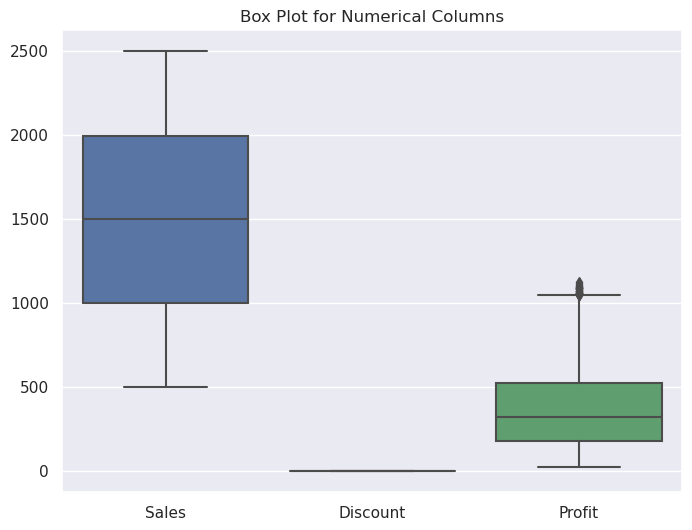

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=numrical_columns)
plt.title('Box Plot for Numerical Columns')

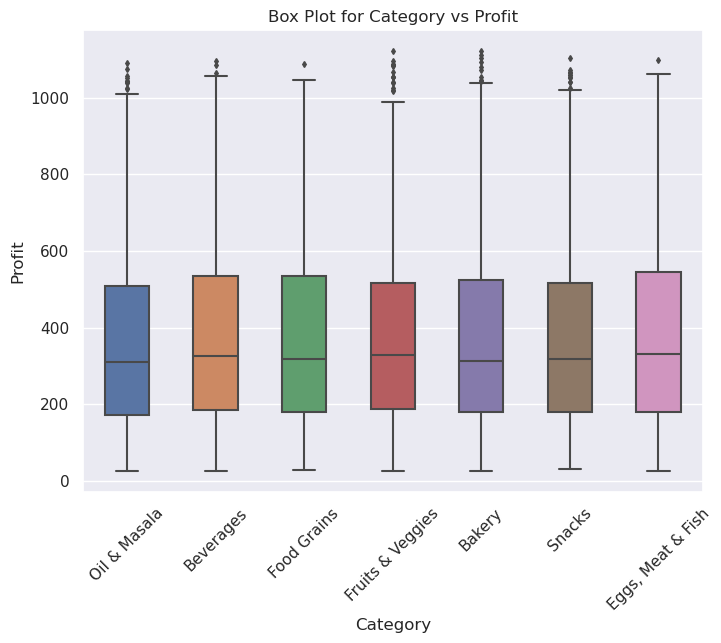

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=super,x='Category',y='Profit', orient='v', fliersize=3, width=0.5)
plt.title('Box Plot for Category vs Profit')
plt.xticks(rotation=45)
plt.show()

# **Handling Outlier**

*   An observation far away from other data
points
*   Profit Column has outliers so we need to handle it.



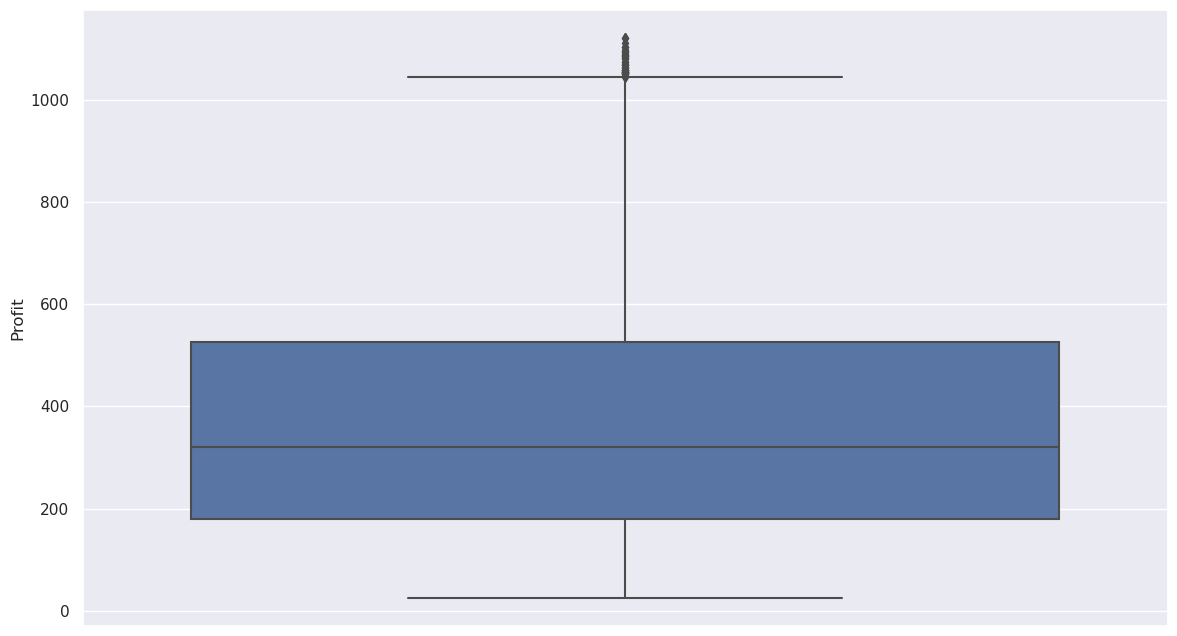

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [41]:
# visualize Profit column
sns.boxplot(data=super,y='Profit')
plt.show()
plt.figure(figsize=(10,10))

# **Removing outlier using percentile**

In [42]:
# 75th percentile
seventy_fifth=super['Profit'].quantile(0.75)
# 25th percentile
twenty_fifth=super['Profit'].quantile(0.25)
#Interquartile range
profit_IQR=seventy_fifth-twenty_fifth
print(profit_IQR)

345.605


In [43]:
# Upper threshold
upper = seventy_fifth + (1.5 * profit_IQR)
# Lower threshold
lower = twenty_fifth - (1.5 * profit_IQR)
print(upper, lower)

1044.035 -338.385


# distribution of profit

<Axes: xlabel='Profit', ylabel='Count'>

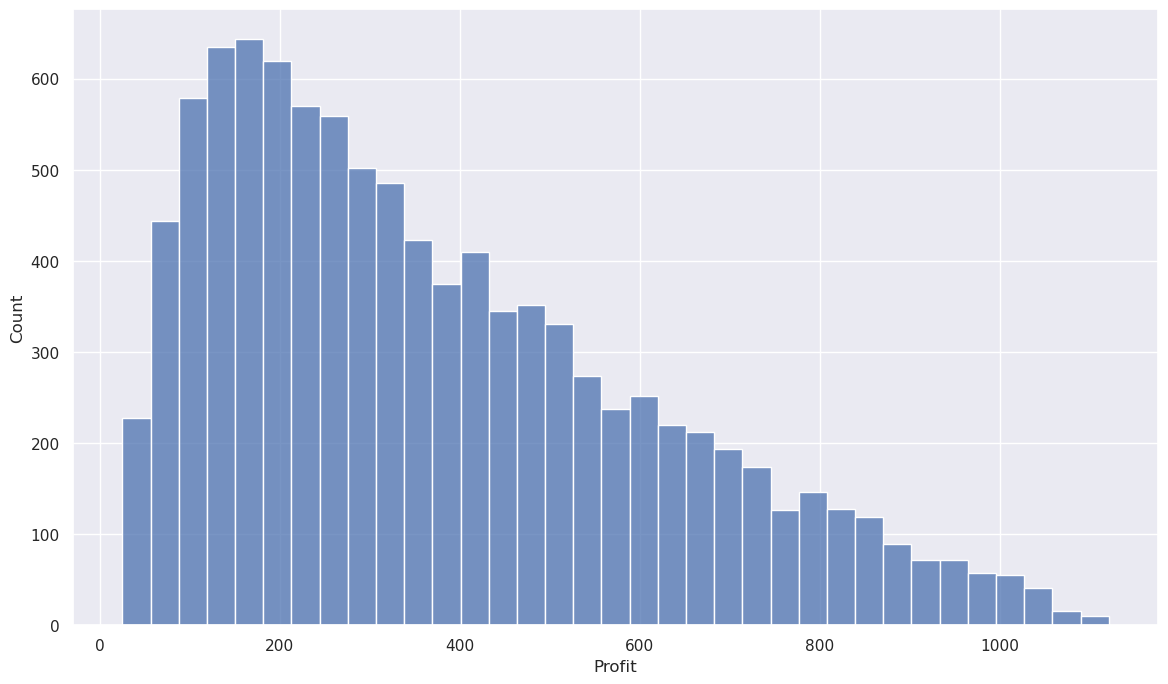

In [44]:
sns.histplot(super['Profit'])

In [45]:
sup1=super[(super['Profit']>lower) & (super['Profit'] <upper)]


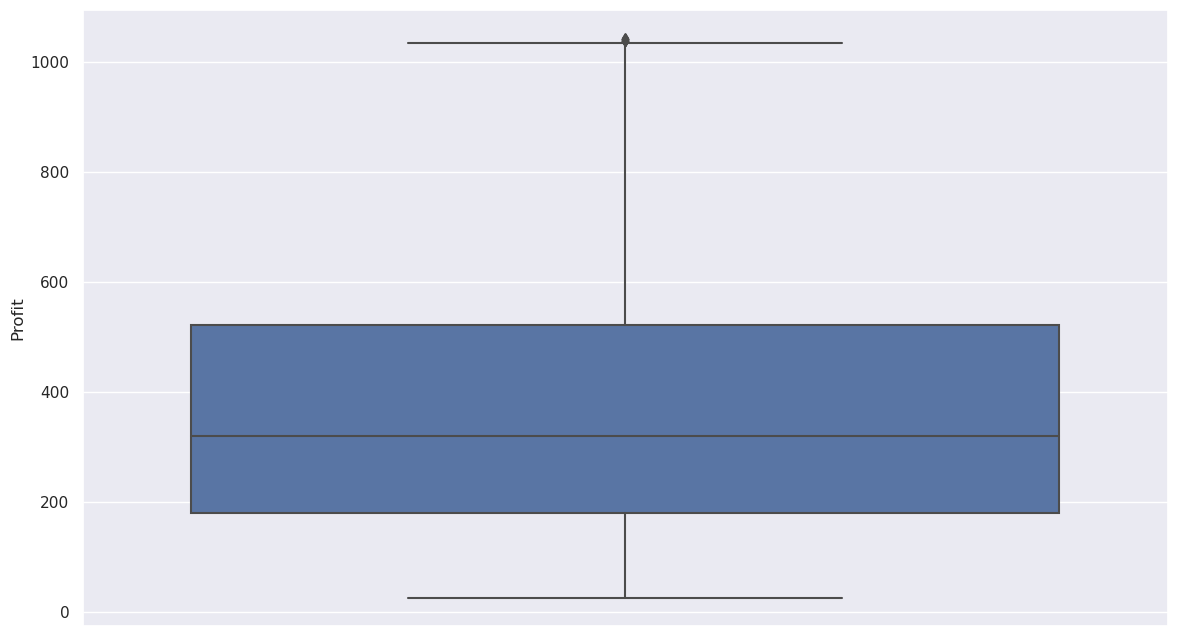

<Figure size 400x400 with 0 Axes>

In [46]:
# boxplot for profit after removing outliers
sns.boxplot(data=sup1,y='Profit')
plt.figure(figsize=(4,4))
plt.show()

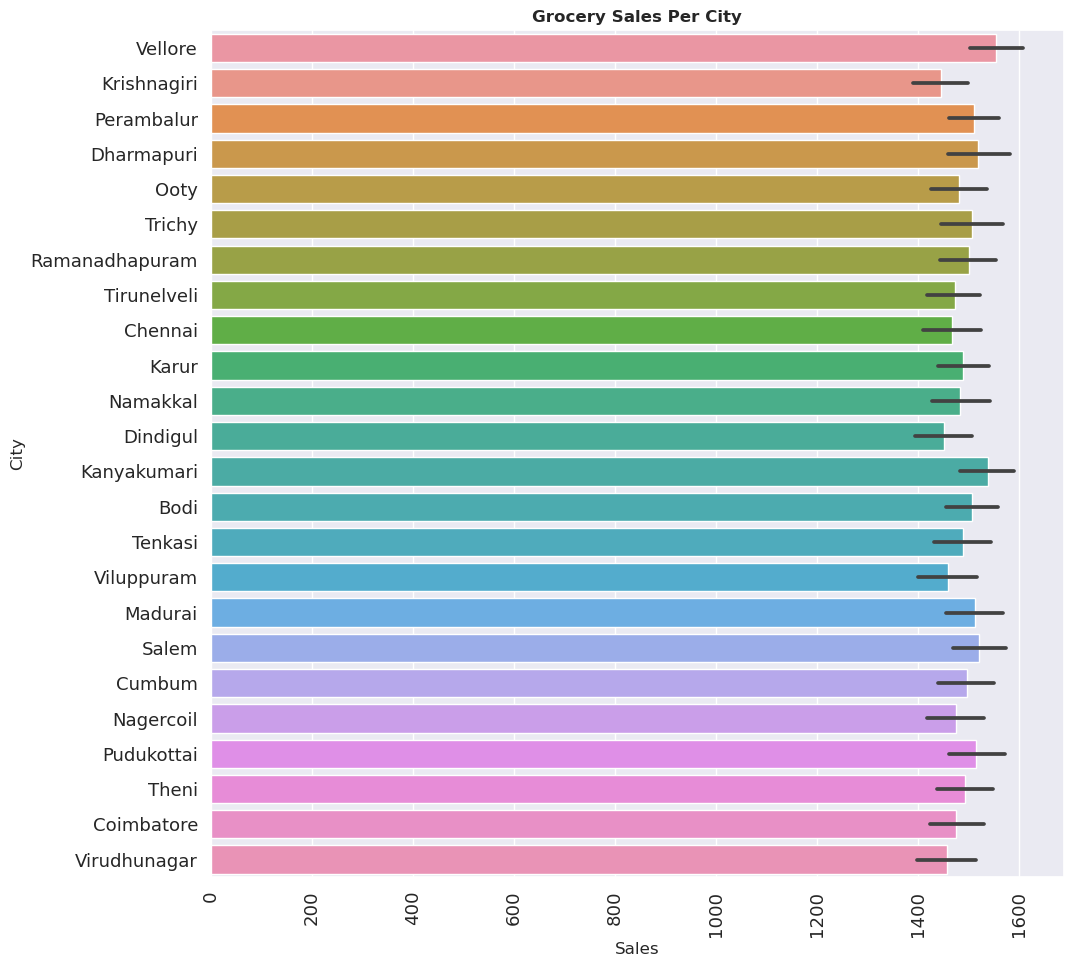

In [47]:
plt.figure(figsize=(11,11))
sns.barplot(x=sup1['Sales'],y=sup1['City'])
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.title('Grocery Sales Per City',fontweight='bold')
plt.show()

In [48]:
sup1['Category'].value_counts()

Snacks               1506
Eggs, Meat & Fish    1485
Fruits & Veggies     1408
Bakery               1405
Beverages            1395
Food Grains          1395
Oil & Masala         1357
Name: Category, dtype: int64

In [49]:
sup1['Category'].nunique()

7

In [50]:
sup1['Sub Category'].value_counts()

Health Drinks         718
Soft Drinks           677
Cookies               517
Breads & Buns         499
Chocolates            497
Noodles               492
Masalas               462
Biscuits              456
Cakes                 450
Edible Oil & Ghee     450
Spices                445
Mutton                394
Eggs                  378
Organic Staples       372
Fresh Fruits          367
Fish                  367
Fresh Vegetables      353
Atta & Flour          351
Chicken               346
Organic Fruits        345
Organic Vegetables    343
Dals & Pulses         342
Rice                  330
Name: Sub Category, dtype: int64

# Summarizing number  of items (category&sub_category) that has purchased.

In [51]:
print(sup1[['Category','Sub Category']].value_counts().to_markdown())

|                                            |   0 |
|:-------------------------------------------|----:|
| ('Beverages', 'Health Drinks')             | 718 |
| ('Beverages', 'Soft Drinks')               | 677 |
| ('Snacks', 'Cookies')                      | 517 |
| ('Bakery', 'Breads & Buns')                | 499 |
| ('Snacks', 'Chocolates')                   | 497 |
| ('Snacks', 'Noodles')                      | 492 |
| ('Oil & Masala', 'Masalas')                | 462 |
| ('Bakery', 'Biscuits')                     | 456 |
| ('Oil & Masala', 'Edible Oil & Ghee')      | 450 |
| ('Bakery', 'Cakes')                        | 450 |
| ('Oil & Masala', 'Spices')                 | 445 |
| ('Eggs, Meat & Fish', 'Mutton')            | 394 |
| ('Eggs, Meat & Fish', 'Eggs')              | 378 |
| ('Food Grains', 'Organic Staples')         | 372 |
| ('Eggs, Meat & Fish', 'Fish')              | 367 |
| ('Fruits & Veggies', 'Fresh Fruits')       | 367 |
| ('Fruits & Veggies', 'Fresh Vegetables')   |

# calculate average sales for each sub_category per region

In [52]:

Sub_Sales_Region=pd.pivot_table(sup1,columns='Region',index=['Sub Category'],values='Sales',aggfunc=np.mean,  fill_value=0)
Sub_Sales_Region.loc[Sub_Sales_Region.mean(axis=1).sort_values(ascending=False).index]


Region,Central,East,North,South,West
Sub Category,,,,,
Masalas,1599.883117,1440.891026,1254,1494.366197,1526.611465
Mutton,1618.259740,1507.632479,0,1508.323944,1574.496124
Eggs,1507.743902,1550.215517,0,1605.927273,1447.392000
Dals & Pulses,1511.646341,1494.977273,0,1565.322034,1532.575221
Fish,1508.535714,1559.392857,0,1578.351852,1445.743590
Soft Drinks,1461.867816,1499.095238,0,1554.272727,1547.029412
Atta & Flour,1441.633803,1579.322917,0,1567.483333,1466.838710
Cakes,1452.688073,1461.723214,0,1568.205128,1564.940397
Spices,1475.838384,1523.194030,0,1547.339623,1483.132075


# Top 5 sub_category sales per region

In [53]:
new1=Sub_Sales_Region.nlargest(5,'Central')
new1.style.bar(color='#FBEEAC')

Region,Central,East,North,South,West
Sub Category,,,,,
Mutton,1618.259740,1507.632479,0,1508.323944,1574.496124
Chicken,1600.436782,1403.058252,0,1498.134615,1480.673077
Masalas,1599.883117,1440.891026,1254,1494.366197,1526.611465
Chocolates,1541.488000,1430.680851,0,1451.412500,1447.344371
Rice,1528.986111,1477.431818,0,1432.084746,1565.126126


# calculate average category profit per city

In [54]:
Cat_Profit=pd.pivot_table(sup1,columns=['Category'],index=['City'],values='Profit',aggfunc=np.mean)
Cat_Profit.loc[Cat_Profit.mean(axis=1).sort_values(ascending=False).index]

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
City,,,,,,,
Vellore,409.358475,422.389219,410.237727,407.048571,401.418571,347.632667,400.459701
Karur,434.574516,389.250588,368.935658,396.556250,381.916769,345.583846,415.772931
Bodi,371.980645,354.523548,379.301429,464.354848,401.483684,328.867273,428.158596
Perambalur,371.121562,368.325352,404.575714,360.960962,362.911905,443.821667,400.641739
Pudukottai,378.090862,362.444828,366.222264,411.477500,382.137536,368.776765,378.496613
Kanyakumari,359.107500,387.179020,385.450274,374.008793,402.372203,366.725823,349.676351
Dharmapuri,361.895965,334.541591,382.007818,394.165091,364.539057,364.378246,415.188148
Trichy,333.736591,347.825849,386.154576,360.591509,397.198654,407.742927,380.242353
Cumbum,396.266182,364.809298,384.029155,373.760175,359.355490,371.092833,350.564375


# Top 5 category profit sorted according to Bakery Profit's

In [55]:
new2=Cat_Profit.nlargest(5,'Bakery')
new2.style.bar(color='#E9B384')

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
City,,,,,,,
Karur,434.574516,389.250588,368.935658,396.556250,381.916769,345.583846,415.772931
Vellore,409.358475,422.389219,410.237727,407.048571,401.418571,347.632667,400.459701
Viluppuram,399.205714,351.566875,343.279111,349.088226,346.264800,391.592037,338.341563
Cumbum,396.266182,364.809298,384.029155,373.760175,359.355490,371.092833,350.564375
Namakkal,390.601935,401.524727,418.452069,368.927167,342.561724,302.601277,284.363387


# creating function that calculate max value (sales or profit) for each row to know in which region or city was the max sales or profit for category or sub_category

In [56]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the function to each row of the pivot table
styled_table = Sub_Sales_Region.style.apply(highlight_max, axis=1)

styled_table

Region,Central,East,North,South,West
Sub Category,,,,,
Atta & Flour,1441.633803,1579.322917,0,1567.483333,1466.838710
Biscuits,1446.123596,1550.531250,0,1446.952941,1471.461039
Breads & Buns,1434.266055,1468.026846,0,1495.776316,1494.381818
Cakes,1452.688073,1461.723214,0,1568.205128,1564.940397
Chicken,1600.436782,1403.058252,0,1498.134615,1480.673077
Chocolates,1541.488000,1430.680851,0,1451.412500,1447.344371
Cookies,1500.256881,1408.372549,0,1474.500000,1509.615385
Dals & Pulses,1511.646341,1494.977273,0,1565.322034,1532.575221
Edible Oil & Ghee,1475.739837,1518.959677,0,1407.792208,1487.849206


In [57]:
# Apply the function to each row of the pivot table
styled_table1 = Cat_Profit.style.apply(highlight_max, axis=1)

styled_table1

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
City,,,,,,,
Bodi,371.980645,354.523548,379.301429,464.354848,401.483684,328.867273,428.158596
Chennai,352.054706,391.285000,408.367424,360.239123,315.598103,396.855238,360.422941
Coimbatore,334.444769,417.836885,327.853788,366.425000,334.756479,363.964211,394.734828
Cumbum,396.266182,364.809298,384.029155,373.760175,359.355490,371.092833,350.564375
Dharmapuri,361.895965,334.541591,382.007818,394.165091,364.539057,364.378246,415.188148
Dindigul,362.088594,353.530000,361.348864,358.814286,365.616290,391.408333,359.209265
Kanyakumari,359.107500,387.179020,385.450274,374.008793,402.372203,366.725823,349.676351
Karur,434.574516,389.250588,368.935658,396.556250,381.916769,345.583846,415.772931
Krishnagiri,385.338429,359.971132,338.479437,394.252063,351.306552,362.923000,348.655000


#  **creating function that calculate min value (sales or profit) for each row to know in which region or city was the min sales or profit for category or sub_category**

In [58]:
def highlight_min(m):
    is_min = m == m.min()
    return ['background-color: red' if v else '' for v in is_min]

# Apply the function to each row of the pivot table
min_table = Cat_Profit.style.apply(highlight_min, axis=1)

min_table

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
City,,,,,,,
Bodi,371.980645,354.523548,379.301429,464.354848,401.483684,328.867273,428.158596
Chennai,352.054706,391.285000,408.367424,360.239123,315.598103,396.855238,360.422941
Coimbatore,334.444769,417.836885,327.853788,366.425000,334.756479,363.964211,394.734828
Cumbum,396.266182,364.809298,384.029155,373.760175,359.355490,371.092833,350.564375
Dharmapuri,361.895965,334.541591,382.007818,394.165091,364.539057,364.378246,415.188148
Dindigul,362.088594,353.530000,361.348864,358.814286,365.616290,391.408333,359.209265
Kanyakumari,359.107500,387.179020,385.450274,374.008793,402.372203,366.725823,349.676351
Karur,434.574516,389.250588,368.935658,396.556250,381.916769,345.583846,415.772931
Krishnagiri,385.338429,359.971132,338.479437,394.252063,351.306552,362.923000,348.655000


# **filtering Data**

In [59]:
sup1.loc[(sup1['Customer Name']=='Amrish')&(sup1['Category']=='Bakery')&(sup1['Sales']<1000)].sort_values(by='Sales',ascending=False)



,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
2085,OD2086,Amrish,Bakery,Biscuits,Tirunelveli,3/13/2018,East,968,0.12,174.24,Tamil Nadu
9909,OD9910,Amrish,Bakery,Breads & Buns,Viluppuram,7/21/2018,East,920,0.14,220.80,Tamil Nadu
1435,OD1436,Amrish,Bakery,Breads & Buns,Salem,7/31/2017,Central,918,0.35,91.80,Tamil Nadu
4899,OD4900,Amrish,Bakery,Biscuits,Theni,11/15/2015,West,868,0.21,373.24,Tamil Nadu
275,OD276,Amrish,Bakery,Cakes,Pudukottai,9/16/2018,West,744,0.11,66.96,Tamil Nadu
8751,OD8752,Amrish,Bakery,Biscuits,Dindigul,04-06-2015,East,701,0.29,126.18,Tamil Nadu
9076,OD9077,Amrish,Bakery,Breads & Buns,Namakkal,08-11-2017,Central,667,0.22,166.75,Tamil Nadu
5140,OD5141,Amrish,Bakery,Cakes,Ramanadhapuram,10/31/2015,West,659,0.15,230.65,Tamil Nadu
2007,OD2008,Amrish,Bakery,Cakes,Viluppuram,02-08-2016,Central,626,0.10,175.28,Tamil Nadu
4645,OD4646,Amrish,Bakery,Biscuits,Namakkal,5/20/2018,West,610,0.28,207.40,Tamil Nadu


In [60]:
sup1.loc[(sup1['Customer Name']=='Harish')&(sup1['Category']=='Food Grains')&(sup1['Sales']>2000)].sort_values(by='Sales',ascending=False)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
5891,OD5892,Harish,Food Grains,Dals & Pulses,Chennai,04-08-2018,Central,2317,0.11,718.27,Tamil Nadu
9166,OD9167,Harish,Food Grains,Organic Staples,Ramanadhapuram,2/23/2015,Central,2085,0.16,938.25,Tamil Nadu


In [61]:
sup1.loc[(sup1['Customer Name']=='Hussain')&(sup1['Category']=='Beverages')&(sup1['Sales']>2000)].sort_values(by='Sales',ascending=False)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
5030,OD5031,Hussain,Beverages,Health Drinks,Pudukottai,11/23/2016,East,2483,0.21,744.90,Tamil Nadu
9467,OD9468,Hussain,Beverages,Health Drinks,Ramanadhapuram,10-07-2018,South,2429,0.32,145.74,Tamil Nadu
5626,OD5627,Hussain,Beverages,Health Drinks,Dharmapuri,11-04-2015,West,2334,0.15,816.90,Tamil Nadu
6483,OD6484,Hussain,Beverages,Soft Drinks,Perambalur,11/14/2016,West,2313,0.25,138.78,Tamil Nadu
7857,OD7858,Hussain,Beverages,Soft Drinks,Nagercoil,04-09-2017,West,2166,0.34,108.30,Tamil Nadu
2108,OD2109,Hussain,Beverages,Soft Drinks,Namakkal,11/27/2017,East,2074,0.30,850.34,Tamil Nadu
3834,OD3835,Hussain,Beverages,Soft Drinks,Namakkal,09-01-2015,East,2041,0.12,326.56,Tamil Nadu




1. Who are the customers with the highest amount of purchases?
2.   Who are the customers with the least amount of purchases?
🧐


In [62]:
# Group the DataFrame by customer name and aggregate the sales and profit values
super_group=sup1.groupby('Customer Name').agg({'Sales':'sum','Profit':'sum'})
# Compute a performance metric based on sales and profit
super_group['Performance']=super_group['Sales']+super_group['Profit']
# Sort the customers by their performance metric in descending order
super_group = super_group.sort_values(by='Performance', ascending=False)

# Print the names of the top 5 customers
print("The top 5 customers are:")
print(super_group.index[:5].tolist())
# Print the names of the last 3 customers
print("The last 3 customers are:")
print(super_group.tail(3).index.tolist())

The top 5 customers are:
['Krithika', 'Amrish', 'Vidya', 'Verma', 'Arutra']
The last 3 customers are:
['Sudha', 'Kumar', 'Hafiz']
